# Brazilian E-Commerce Dataset by Olist

# 巴西电商olist的数据集分析

这是巴西Olist电子商务的数据集，包含了2016年到2018年在巴西多个市场中进行的10万份订单。
同时，这是一份真实的商业数据，已经被匿名化。

之后他们通过电子邮件的调查形式，收集顾客对于客户满意度的评分。

现在将用以下形式对这个数据集进行分析：

1、Customer 顾客

2、Product 产品

3、Payment 支付方式

4、 Order 订单

5、Classified 

6、Geolocation 地理位置

## 0. Load  Package And Data 加载分析包和数据集

In [1]:
#load packages 加载分析包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
#read all csv files 加载数据集
product = pd.read_csv("product_category_name_translation.csv")
payment = pd.read_csv("olist_public_dataset_v2_payments.csv")
customer = pd.read_csv("olist_public_dataset_v2_customers.csv")
order = pd.read_csv("olist_public_dataset_v2.csv")
classified = pd.read_csv("olist_classified_public_dataset.csv")
geolocation = pd.read_csv("geolocation_olist_public_dataset.csv")

## 1.Clean Data 清理数据

#### 1.1 product 数据集

In [3]:
product.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [4]:
#explore the datasets 查看数据集详情
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
product_category_name            71 non-null object
product_category_name_english    71 non-null object
dtypes: object(2)
memory usage: 1.2+ KB


In [5]:
product.duplicated().sum()

0

In [6]:
product.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

#### 1.2 payment 数据集

In [7]:
payment.head(2)

,order_id,installments,sequential,payment_type,value
0,c3d9e402b6a0fbe2a5f7fc5b41117c38,4,1,credit_card,237.45
1,733d6bf02be72825b2c6f120262b9aa9,1,1,credit_card,165.90


In [8]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104848 entries, 0 to 104847
Data columns (total 5 columns):
order_id        104848 non-null object
installments    104848 non-null int64
sequential      104848 non-null int64
payment_type    104848 non-null object
value           104848 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [9]:
payment.duplicated().sum()

3956

In [10]:
payment.drop_duplicates(inplace = True)

In [11]:
payment.duplicated().sum()

0

再次使用这个代码验证是否真的去掉重复值了

In [12]:
payment.isnull().sum()

order_id        0
installments    0
sequential      0
payment_type    0
value           0
dtype: int64

#### 1.3 customer 数据集

In [13]:
customer.head(2)

,customer_id,customer_unique_id
0,0000ca4ff2795842fd6b122c6d974468,ac0e5d7f07043dd32831bdad3b99ad26
1,00010f206878ba01f199aec4237de72e,4ed24aaed4079fe0661c0e4b3b420dff


In [14]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96264 entries, 0 to 96263
Data columns (total 2 columns):
customer_id           96264 non-null object
customer_unique_id    96264 non-null object
dtypes: object(2)
memory usage: 1.5+ MB


In [15]:
customer.duplicated().sum()

0

In [16]:
customer.isnull().sum()

customer_id           0
customer_unique_id    0
dtype: int64

customer的数据集十分干净，没有重复值也没有缺失值

#### 1.4 order 数据集

In [17]:
order.head(2)

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.9,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.0,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00


In [18]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
order_id                         100000 non-null object
order_status                     100000 non-null object
order_products_value             100000 non-null float64
order_freight_value              100000 non-null float64
order_items_qty                  100000 non-null int64
order_sellers_qty                100000 non-null int64
order_purchase_timestamp         100000 non-null object
order_aproved_at                 99982 non-null object
order_estimated_delivery_date    100000 non-null object
order_delivered_customer_date    97595 non-null object
customer_id                      100000 non-null object
customer_city                    100000 non-null object
customer_state                   100000 non-null object
customer_zip_code_prefix         100000 non-null int64
product_category_name            100000 non-null object
product_name_lenght              100000 non-null int6

In [19]:
order.isnull().sum()

order_id                             0
order_status                         0
order_products_value                 0
order_freight_value                  0
order_items_qty                      0
order_sellers_qty                    0
order_purchase_timestamp             0
order_aproved_at                    18
order_estimated_delivery_date        0
order_delivered_customer_date     2405
customer_id                          0
customer_city                        0
customer_state                       0
customer_zip_code_prefix             0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_id                           0
review_id                            0
review_score                         0
review_comment_title             91738
review_comment_message           57511
review_creation_date                 0
review_answer_timestamp              0
dtype: int64

In [20]:
order.duplicated().sum()

0

#### 1.5 classified 数据集

In [21]:
classified.drop("Unnamed: 0", axis = 1,inplace = True)
classified.head(2)

,id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,votes_delayed,votes_low_quality,votes_return,votes_not_as_anounced,votes_partial_delivery,votes_other_delivery,votes_other_order,votes_satisfied,most_voted_subclass,most_voted_class
0,1,delivered,89.99,14.38,1,1,2017-08-30 11:41:01.000000,2017-08-30 11:55:08.970352,2017-09-21 00:00:00.000000,2017-09-08 20:35:27.276847,...,0,0,0,0,0,0,0,3,satisfeito,satisfeito_com_pedido
1,2,delivered,69.00,15.23,1,1,2017-09-26 09:13:36.000000,2017-09-26 09:28:10.922048,2017-10-24 00:00:00.000000,2017-09-29 21:13:04.984841,...,0,0,0,0,0,0,0,0,antes_prazo,satisfeito_com_pedido


In [22]:
classified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 33 columns):
id                               3584 non-null int64
order_status                     3584 non-null object
order_products_value             3584 non-null float64
order_freight_value              3584 non-null float64
order_items_qty                  3584 non-null int64
order_sellers_qty                3584 non-null int64
order_purchase_timestamp         3584 non-null object
order_aproved_at                 3584 non-null object
order_estimated_delivery_date    3584 non-null object
order_delivered_customer_date    3467 non-null object
customer_city                    3584 non-null object
customer_state                   3584 non-null object
customer_zip_code_prefix         3584 non-null int64
product_category_name            3584 non-null object
product_name_lenght              3584 non-null int64
product_description_lenght       3584 non-null int64
product_photos_qty               

In [23]:
classified.duplicated().sum()

0

In [24]:
classified.isnull().sum()

id                                  0
order_status                        0
order_products_value                0
order_freight_value                 0
order_items_qty                     0
order_sellers_qty                   0
order_purchase_timestamp            0
order_aproved_at                    0
order_estimated_delivery_date       0
order_delivered_customer_date     117
customer_city                       0
customer_state                      0
customer_zip_code_prefix            0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
review_score                        0
review_comment_title             3584
review_comment_message              0
review_creation_date                0
review_answer_timestamp             0
votes_before_estimate               0
votes_delayed                       0
votes_low_quality                   0
votes_return                        0
votes_not_as

In [25]:
#remove some unrelative columns 去掉不相关的列
unrelative_cols = ["votes_delayed","votes_low_quality","votes_return","votes_not_as_anounced","votes_partial_delivery","votes_other_delivery","votes_other_order","review_comment_title","review_creation_date"]
classified.drop(unrelative_cols, axis = 1, inplace = True)

In [26]:
classified.head(2)

,id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_name_lenght,product_description_lenght,product_photos_qty,review_score,review_comment_message,review_answer_timestamp,votes_before_estimate,votes_satisfied,most_voted_subclass,most_voted_class
0,1,delivered,89.99,14.38,1,1,2017-08-30 11:41:01.000000,2017-08-30 11:55:08.970352,2017-09-21 00:00:00.000000,2017-09-08 20:35:27.276847,...,59,492,3,5,tudo certo,2017-09-10 03:27:54+00:00,0,3,satisfeito,satisfeito_com_pedido
1,2,delivered,69.00,15.23,1,1,2017-09-26 09:13:36.000000,2017-09-26 09:28:10.922048,2017-10-24 00:00:00.000000,2017-09-29 21:13:04.984841,...,50,679,4,5,o produto chegou antes de prazo parabens pela ...,2017-10-03 05:34:20+00:00,3,0,antes_prazo,satisfeito_com_pedido


In [27]:
classified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 24 columns):
id                               3584 non-null int64
order_status                     3584 non-null object
order_products_value             3584 non-null float64
order_freight_value              3584 non-null float64
order_items_qty                  3584 non-null int64
order_sellers_qty                3584 non-null int64
order_purchase_timestamp         3584 non-null object
order_aproved_at                 3584 non-null object
order_estimated_delivery_date    3584 non-null object
order_delivered_customer_date    3467 non-null object
customer_city                    3584 non-null object
customer_state                   3584 non-null object
customer_zip_code_prefix         3584 non-null int64
product_category_name            3584 non-null object
product_name_lenght              3584 non-null int64
product_description_lenght       3584 non-null int64
product_photos_qty               

#### 1.6 geolocation 数据集

In [28]:
geolocation.head(2)

,zip_code_prefix,city,state,lat,lng
0,10,sao paulo,sp,-23.547807,-46.636122
1,10,sao paulo,sp,-23.546081,-46.644820


In [29]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323016 entries, 0 to 323015
Data columns (total 5 columns):
zip_code_prefix    323016 non-null int64
city               323016 non-null object
state              323016 non-null object
lat                323016 non-null float64
lng                323016 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 12.3+ MB


In [30]:
geolocation.duplicated().sum()

47162

In [31]:
geolocation.drop_duplicates(inplace = True)

In [32]:
geolocation.duplicated().sum()

0

In [33]:
geolocation.isnull().sum()

zip_code_prefix    0
city               0
state              0
lat                0
lng                0
dtype: int64

从以上的观察中，发现有一些列是空的，或者与这次的分析不相关的内容，所以将这些列全部清理

## 2、EDA 探索性数据分析

#### 根据单个订单的数据粒度

#### 2.1 payment 支付方式

In [34]:
#write a function for visualization 制作用于可视化的函数
def plot(dataset,feature,plot_kind):
    
    dataset[feature].value_counts().plot(kind = plot_kind,
                                        color = "red",
                                        alpha = 0.6)
    
    return None

In [35]:
payment.head(2)

,order_id,installments,sequential,payment_type,value
0,c3d9e402b6a0fbe2a5f7fc5b41117c38,4,1,credit_card,237.45
1,733d6bf02be72825b2c6f120262b9aa9,1,1,credit_card,165.90


Text(0.5,1,'Installments In Payment')

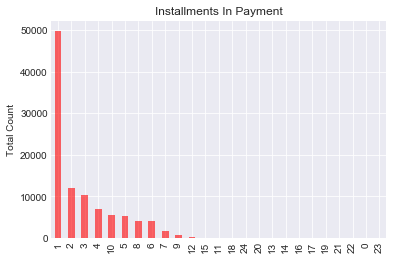

In [36]:
plot(payment,"installments","bar")

plt.ylabel("Total Count")
plt.title("Installments In Payment")

分期付款中，一次性付全款的使用方法最多，其次是2次分期、3次分期、4次分期、10次分期

Text(0.5,1,'Different Payment')

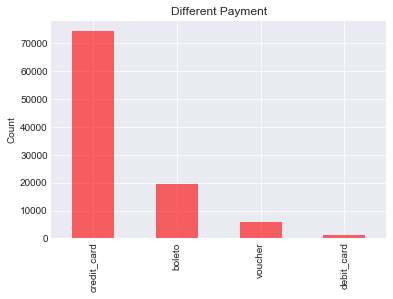

In [37]:
plot(payment,"payment_type","bar")

plt.ylabel("Count")
plt.title("Different Payment")

付款方式中，使用credit_card最多，boleto排第二，voucher其次，最小的是debitcard

Text(0,0.5,'Total Order Value(million dollar)')

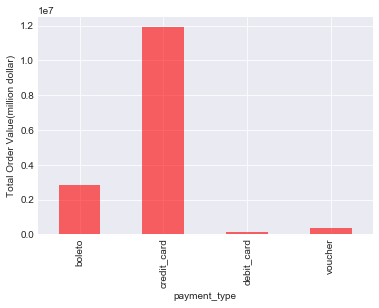

In [38]:
payment.groupby("payment_type")["value"].sum().plot(kind = "bar", 
                                                    color = "red",
                                                    alpha = 0.6)
plt.ylabel("Total Order Value(million dollar)")

付款方式的订单金额的排序趋势与上图分期付款的使用次数的趋势一致，也是credit_card最多，boleto排第二，voucher其次，最小的是debitcard

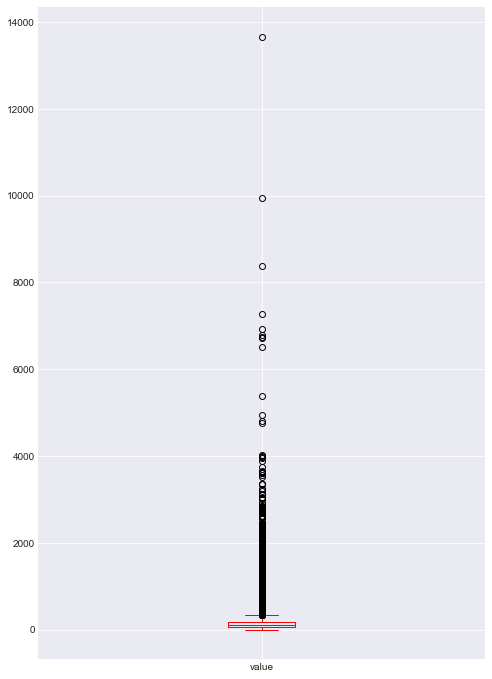

In [39]:
payment.value.plot(kind = "box",
                   color = "red",
                   figsize = (8,12))

对付款金额使用箱型图查看一下分布状况，发现虽然绝大部分的订单少于2000，但是依然有非常多的订单金额超过了2000，甚至接近14000

(0, 500)

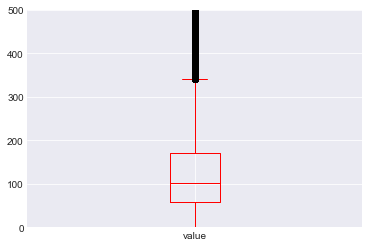

In [40]:
payment.value.plot(kind = "box",
                   color = "red")
plt.ylim([0,500])

对箱型图的取值范围进行限制，查看绝大多数的订单金额为小于350

In [41]:
payment.value.describe()

count    100892.000000
mean        150.985469
std         205.905919
min           0.000000
25%          58.950000
50%         101.020000
75%         171.630000
max       13664.080000
Name: value, dtype: float64

订单金额的分布很广，75%的订单金额大概175左右

In [42]:
payment[payment.value == 0]

,order_id,installments,sequential,payment_type,value
21214,fa65dad1b0e818e3ccc5cb0e39231352,1,13,voucher,0.0
21215,fa65dad1b0e818e3ccc5cb0e39231352,1,14,voucher,0.0
29699,45ed6e85398a87c253db47c2d9f48216,1,3,voucher,0.0


这三个订单都是订单金额为0的，细查发现是使用了voucher代金券，所以实收金额为0。

In [43]:
payment[payment.value == 13664.080000]

,order_id,installments,sequential,payment_type,value
51787,03caa2c082116e1d31e67e9ae3700499,1,1,credit_card,13664.08


有一个非常大的订单金额，在平均金额为153.300072的情况下，达到单笔13664.08；

详情来看，这笔确实是存在的，使用了信用卡付款。

#### 2.2 order 订单

In [44]:
order.head(2)

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.9,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.0,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00


在order数据集中出现多个订单时间，按照order_aproved_at【订单确认时间】来计算年销售额。

In [45]:
order.order_aproved_at = pd.to_datetime(order.order_aproved_at)
order["year"] = order.order_aproved_at.dt.year

In [46]:
order.head(2)

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,year
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.9,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00,2017.0
1,59af46052a799e80e2f0c665c587731d,delivered,15.0,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00,2017.0


In [47]:
#更改year列的数据类型
order["order_date"] = pd.to_datetime(order.order_aproved_at,format= "%Y%m%d")

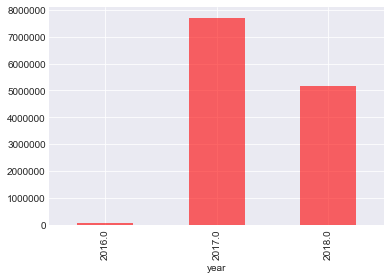

In [48]:
order.groupby("year")["order_products_value"].sum().plot(kind = "bar",
                                                         color = "red",
                                                         alpha = 0.6)

从上图可以看出，2016年的订单金额非常小，而最大的是2017年的订单金额

In [49]:
order.order_aproved_at.describe()

count                          99982
unique                         96239
top       2017-10-18 13:06:21.646633
freq                              10
first            2016-09-15 12:16:38
last      2018-09-28 11:05:22.374345
Name: order_aproved_at, dtype: object

最早的订单日期是，2016年9月15日；

最晚的订单日期是，2018年9月28日，

由此看来，2016年与2018年的数据都不是自然年从1月1日到12月31日的完整数据。

所以将每月算作一个结算周期，来看一下订单金额的分布状况。

order.nunique()

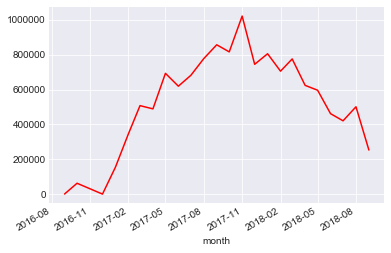

In [50]:
order["month"] = order.order_date.values.astype("datetime64[M]")
order.groupby("month").order_products_value.sum().plot(color = "red")

order_products_value 销售额按照月份的趋势图，2016-12是销售额最低的时间，而2017-11是销售额最高的时间。

从2016-08到2017-11销售额的整体趋势是向上的，而2017-11到2018-09的销售额是呈下降趋势的。

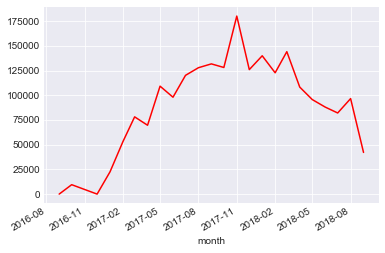

In [51]:
order.groupby("month").order_freight_value.sum().plot(color = "red")

order_freight_value 运费按照月份的趋势图，整体趋势与销售额的趋势十分相似。

In [52]:
order.order_status.value_counts()

delivered      97590
shipped         1190
canceled         486
processing       392
invoiced         331
unavailable        9
approved           2
Name: order_status, dtype: int64

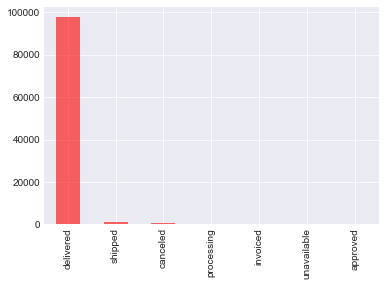

In [53]:
order.order_status.value_counts().plot(kind = "bar",
                                       color = "red",
                                       alpha = 0.6)

已经显示delivered的订单是没有问题的，现在更关注那些没有成交的订单，所以将状态显示为delivered去掉，查看剩下的部分

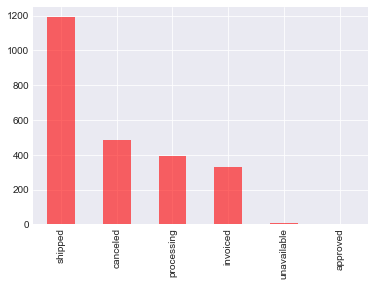

In [54]:
order.query('order_status != "delivered"')["order_status"].value_counts().plot(kind = "bar", 
                                                                               color = "red",
                                                                               alpha = 0.6)

将正常成交的订单去掉之后，剩下的订单状态中，选用shipped 作为运送方式的还是最多的，异常状态的订单还是比较少的。

In [55]:
unavailable_order = order.query('order_status == "unavailable"')
unavailable_order

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,year,order_date,month
2081,1a47da1d66c70489c8e35fe2b5433ab7,unavailable,249.90,20.85,1,1,2016-10-07 18:16:31.000000,2016-10-07 18:53:48.081970,2016-12-07 00:00:00.000000,NaN,...,eba7488e1c67729f045ab43fac426f2e,1a47da1d66c70489c8e35fe2b5433ab7,5,NaN,NaN,2016-12-09 00:00:00.000000,2016-12-09 13:25:52+00:00,2016.0,2016-10-07 18:53:48.081970,2016-10-01
2557,dc18a044b56ed174037ca164cdf2e921,unavailable,1199.00,28.78,1,1,2016-10-05 14:16:28.000000,2016-10-06 15:56:49.555215,2016-11-29 00:00:00.000000,NaN,...,faa268ecc8a8434cb4ebee091b3222d6,dc18a044b56ed174037ca164cdf2e921,1,NaN,eu comprei o produto no mês de outubro com a i...,2016-12-01 00:00:00.000000,2016-12-01 12:39:57+00:00,2016.0,2016-10-06 15:56:49.555215,2016-10-01
11988,abd24ee722d00b7c4d37a8ae2ce3e41e,unavailable,95.99,12.38,1,1,2018-02-22 08:55:52.000000,2018-02-22 09:08:49.885115,2018-03-08 00:00:00.000000,NaN,...,638882546765f357dc667b5987ceb69d,abd24ee722d00b7c4d37a8ae2ce3e41e,1,NaN,esta loja não cumpre o que foi acordado eu ain...,2018-03-10 00:00:00.000000,2018-03-12 06:44:02+00:00,2018.0,2018-02-22 09:08:49.885115,2018-02-01
30739,54bb06e1ca86bd99ee2a8d6288bf4ede,unavailable,64.90,25.33,1,1,2016-10-06 13:38:39.000000,2016-10-06 14:22:19.057395,2016-12-12 00:00:00.000000,NaN,...,bef13288a0f8b26d763411ced1dfa268,54bb06e1ca86bd99ee2a8d6288bf4ede,1,NaN,produto não entregue demoraram mais de um mês ...,2016-12-14 00:00:00.000000,2016-12-16 11:34:47+00:00,2016.0,2016-10-06 14:22:19.057395,2016-10-01
44106,4c017db6eb0a09ce66871913204214d2,unavailable,8.90,10.96,1,1,2016-10-05 19:56:45.000000,2016-10-06 16:02:08.081957,2016-11-25 00:00:00.000000,NaN,...,db729c4310411c0be04a91785f063ea8,4c017db6eb0a09ce66871913204214d2,1,NaN,comprei um corretivo praticamente dois meses d...,2016-11-27 00:00:00.000000,2016-11-27 16:28:00+00:00,2016.0,2016-10-06 16:02:08.081957,2016-10-01
68521,bfc90fdd579588ea538f4ca2173d9ada,unavailable,59.99,19.15,1,1,2016-10-05 23:37:57.000000,2016-10-06 15:55:42.161087,2016-12-01 00:00:00.000000,NaN,...,440bf6fbe765694cbcb314a9be39e4a1,bfc90fdd579588ea538f4ca2173d9ada,1,NaN,comprei o produto dia 5 de outubro sendo que h...,2016-12-03 00:00:00.000000,2016-12-03 12:27:24+00:00,2016.0,2016-10-06 15:55:42.161087,2016-10-01
74509,a121d1352e31de3b2c376e5377e3c62e,unavailable,89.99,21.08,1,1,2016-10-04 00:38:02.000000,2016-10-04 10:39:26.184438,2016-12-06 00:00:00.000000,NaN,...,7d5dc72938e54001a0b7ee8b9bacc712,a121d1352e31de3b2c376e5377e3c62e,1,NaN,acho muito ruim essa loja pois vc compra paga ...,2016-12-08 00:00:00.000000,2016-12-08 06:07:59+00:00,2016.0,2016-10-04 10:39:26.184438,2016-10-01
79170,3c3ca08854ca922fe8e9cedfd6841c8a,unavailable,35.00,10.96,1,1,2016-10-08 12:13:38.000000,2016-10-08 13:21:35.474352,2016-11-30 00:00:00.000000,NaN,...,ac6c24af9f913c9375a3ea77883bda6e,3c3ca08854ca922fe8e9cedfd6841c8a,1,NaN,a empresa deixou disponível a venda como se ti...,2016-12-02 00:00:00.000000,2017-08-09 23:38:05+00:00,2016.0,2016-10-08 13:21:35.474352,2016-10-01
89582,2fd1c83dd4714cf3cf796fffb6c8de62,unavailable,99.00,9.12,1,4,2016-10-05 17:21:29.000000,2016-10-06 15:55:40.977461,2016-11-29 00:00:00.000000,NaN,...,17c7ec33a1657924ad493e6978b4bf91,2fd1c83dd4714cf3cf796fffb6c8de62,1,NaN,prazo não foi cumprido até hoje não chegou pri...,2016-12-01 00:00:00.000000,2016-12-03 11:21:38+00:00,2016.0,2016-10-06 15:55:40.977461,2016-10-01


有9个订单是失效的，于是我们来看一下这9个订单的详情。

In [56]:
def plot_box(dataframe,column):
    dataframe[column].plot(kind = "box", color = "red")

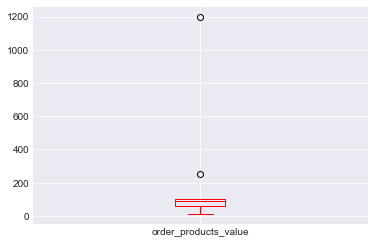

In [57]:
plot_box(unavailable_order,"order_products_value")

订单状态显示为unavailable的订单金额，区间为8.9到1199之间。

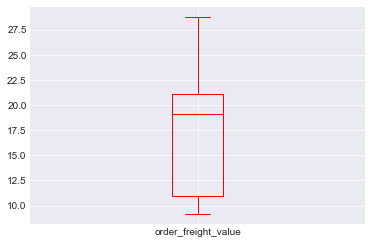

In [58]:
unavailable_order.order_freight_value.plot(kind = "box",color = "red")

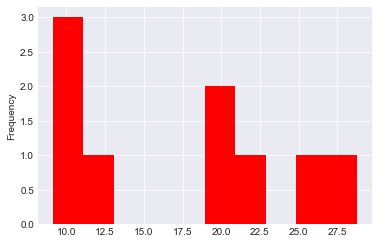

In [59]:
unavailable_order.order_freight_value.plot(kind = "hist",color = "red")

订单状态显示为unavailable的订单运费，区间为9.12到28.78之间

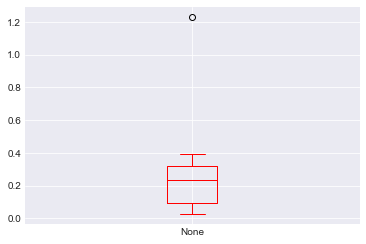

In [60]:
unavailable_order_prop = unavailable_order.order_freight_value/unavailable_order.order_products_value
unavailable_order_prop.plot(kind = 'box', color = "red")

来看一下运费与订单金额比值的关系，多数在0.4之下，有一个特别明显的异常值，是index为44106的订单，运费在订单总金额之上。

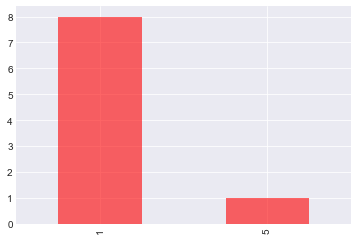

In [61]:
unavailable_order.review_score.value_counts().plot(kind = 'bar', color = "red", alpha = 0.6)

订单状态显示为unavailable，客户评分是1个5分，其他都是1分。

In [62]:
approved_order = order.query('order_status == "approved"')
approved_order

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,year,order_date,month
26469,132f1e724165a07f6362532bfb97486e,approved,169.9,9.56,1,1,2017-04-25 01:25:34.000000,2017-04-30 20:32:41.802385,2017-05-22 00:00:00.000000,NaN,...,c4a1c4638fa9e2e4861d141d6e0259e7,132f1e724165a07f6362532bfb97486e,4,NaN,NaN,2017-05-24 00:00:00.000000,2017-05-24 18:10:54+00:00,2017.0,2017-04-30 20:32:41.802385,2017-04-01
99500,a2e4c44360b4a57bdff22f3a4630c173,approved,39.7,21.92,2,1,2017-02-06 20:18:17.000000,2017-02-06 20:30:19.054046,2017-03-01 00:00:00.000000,NaN,...,dcecb611ba878d5d8c7853585b285c12,a2e4c44360b4a57bdff22f3a4630c173,1,NaN,NaN,2017-03-03 00:00:00.000000,2017-03-14 01:27:45+00:00,2017.0,2017-02-06 20:30:19.054046,2017-02-01


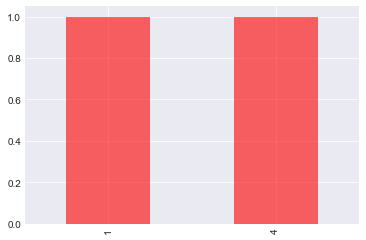

In [63]:
plot(approved_order,"review_score","bar")

有两个订单状态为 approved，评分一个为1，一个为4

#### 2.3 customer 顾客

In [64]:
customer.head(2)

,customer_id,customer_unique_id
0,0000ca4ff2795842fd6b122c6d974468,ac0e5d7f07043dd32831bdad3b99ad26
1,00010f206878ba01f199aec4237de72e,4ed24aaed4079fe0661c0e4b3b420dff


In [65]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96264 entries, 0 to 96263
Data columns (total 2 columns):
customer_id           96264 non-null object
customer_unique_id    96264 non-null object
dtypes: object(2)
memory usage: 1.5+ MB


In [66]:
customer_2 = customer.merge(order,how = "inner",left_on = "customer_id",right_on = "customer_id")

In [67]:
customer_2.head(2)

,customer_id,customer_unique_id,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,...,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,year,order_date,month
0,0000ca4ff2795842fd6b122c6d974468,ac0e5d7f07043dd32831bdad3b99ad26,bdbeac23af8ee5dc1481782eaca3c24e,delivered,15.0,7.78,1,1,2018-01-27 10:04:53.000000,2018-01-30 04:31:19.335683,...,e91c99866c8b72b1e95cdccfa052358b,bdbeac23af8ee5dc1481782eaca3c24e,5,NaN,NaN,2018-02-02 00:00:00.000000,2018-02-03 22:28:53+00:00,2018.0,2018-01-30 04:31:19.335683,2018-01-01
1,00010f206878ba01f199aec4237de72e,4ed24aaed4079fe0661c0e4b3b420dff,e12e86e5dbfcb5d2820427e70fd658f3,delivered,72.9,22.83,1,1,2017-09-10 14:35:08.000000,2017-09-12 04:25:20.792749,...,2960262e3809a91a7908e9b5c5562e8a,e12e86e5dbfcb5d2820427e70fd658f3,5,NaN,NaN,2017-09-26 00:00:00.000000,2017-09-27 15:58:47+00:00,2017.0,2017-09-12 04:25:20.792749,2017-09-01


In [68]:
customer_2.shape

(100000, 29)

In [69]:
customer_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 29 columns):
customer_id                      100000 non-null object
customer_unique_id               100000 non-null object
order_id                         100000 non-null object
order_status                     100000 non-null object
order_products_value             100000 non-null float64
order_freight_value              100000 non-null float64
order_items_qty                  100000 non-null int64
order_sellers_qty                100000 non-null int64
order_purchase_timestamp         100000 non-null object
order_aproved_at                 99982 non-null datetime64[ns]
order_estimated_delivery_date    100000 non-null object
order_delivered_customer_date    97595 non-null object
customer_city                    100000 non-null object
customer_state                   100000 non-null object
customer_zip_code_prefix         100000 non-null int64
product_category_name            100000 non-n

##### 2.3.1销售金额最高的前10项产品是什么？

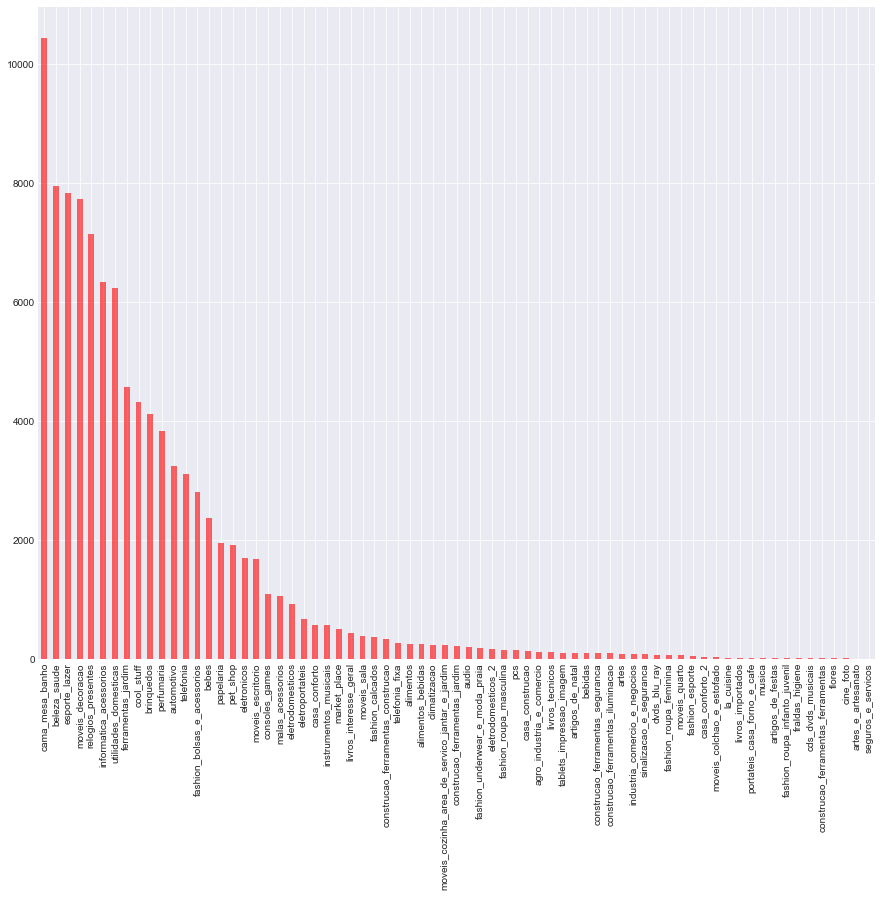

In [70]:
customer_2.product_category_name.value_counts().plot(kind = "bar",color = "red", 
                                                     alpha =0.6,figsize = (15,12))

In [71]:
product_top_10 = customer_2.product_category_name.value_counts()[0:10]
product_top_10

cama_mesa_banho           10435
beleza_saude               7939
esporte_lazer              7832
moveis_decoracao           7728
relogios_presentes         7130
informatica_acessorios     6329
utilidades_domesticas      6230
ferramentas_jardim         4570
cool_stuff                 4315
brinquedos                 4114
Name: product_category_name, dtype: int64

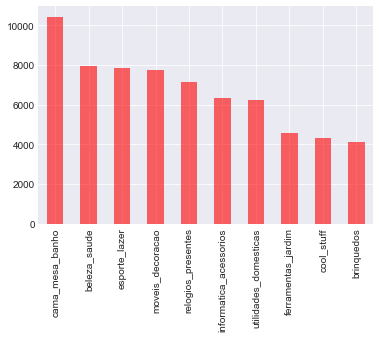

In [72]:
product_top_10.plot(kind = "bar", color = "red",alpha = 0.6)

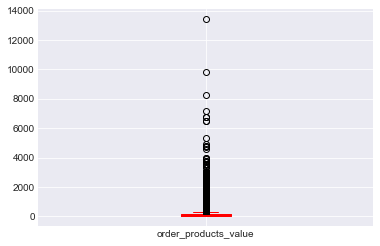

In [73]:
plot_box(customer_2,"order_products_value")

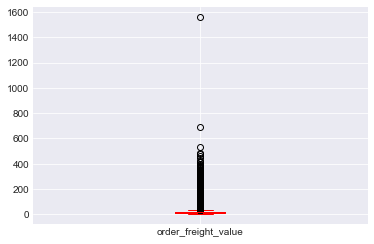

In [74]:
plot_box(customer_2,"order_freight_value")

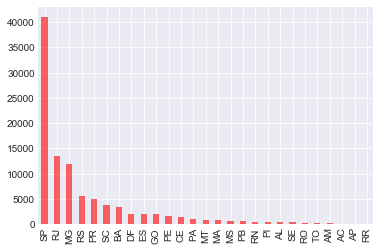

In [75]:
plot(customer_2,"customer_state","bar")

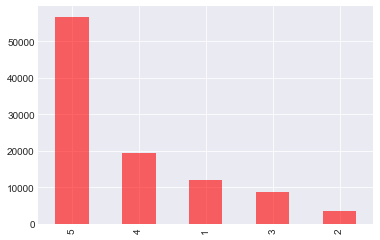

In [76]:
plot(customer_2,"review_score","bar")

订单包含两个或更多不同的产品，则可能会重复发表评论

In [77]:
customer_2.order_id.nunique()

96264

In [78]:
order_group = customer_2.groupby("order_id")
order_group

In [79]:
order_index = order_group.order_products_value.sum()/order_group.order_products_value.count()
order_index

order_id
0000f01da58c553799200eb71eb0563b     54.900
00010242fe8c5a6d1ba2dd792cb16214     58.900
00026c8a4fe2c14efa2afe807921981c    389.980
000312d02b605a8a630c3a9882793ffb    600.000
000330af600103828257923c9aa98ae2     29.745
00042b26cf59d7ce69dfabb4e55b4fd9    199.900
00048cc3ae777c65dbb7d2a0634bc1ea     21.900
0004940968b6f9fdb7ef5bb315d3dd45     28.990
0004e45495a3c003903562f035a835ce     89.900
00054e8431b9d7675808bcb819fb4a32     19.900
000576fe39319847cbb9d288c5617fa6    810.000
000600fcb6cd339109fe8f27d7ce7bca     29.990
00063b381e2406b52ad429470734ebd5     45.000
0006ec9db01a64e59a68b2c340bf65a7     74.000
0008288aa423d2a3f00fcb17cd7d8719     99.800
000844e66735b6b771578023091a2a37     69.900
0009792311464db532ff765bf7b182ae     99.900
000a1a23c186e860e31dd744d93f059a     99.900
000a950f6be5856bec0567ebccfa5d54     26.900
000aed2e25dbad2f9ddb70584c5a2ded    144.000
000e8b0af0aac34c2d96d4baf5162ccf     55.900
000ed9901656cc1e7c2f973f8c6e2309     98.900
000f99bb272406acd1dce9b

##### 2.3.2 消费金额最高的前20%的顾客是哪些人？他们的消费模式有什么特征？

##### 2.4 Geolocation 地理位置

In [80]:
geolocation.head(2)

,zip_code_prefix,city,state,lat,lng
0,10,sao paulo,sp,-23.547807,-46.636122
1,10,sao paulo,sp,-23.546081,-46.644820


##### 2.4.1 zip code 区域代码

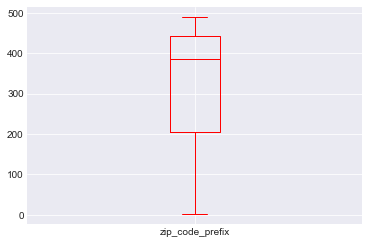

In [81]:
geolocation.zip_code_prefix.value_counts().plot(kind = "box",color = "red")

##### 2.4.2 lat	and lng 经纬度 

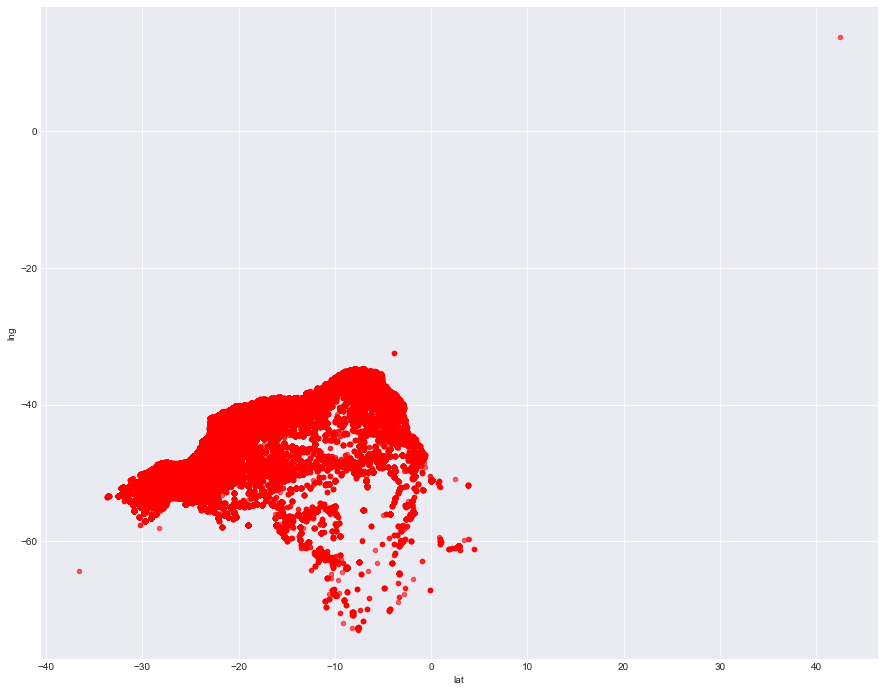

In [82]:
geolocation.plot(x = "lat", y = "lng",
                 kind = "scatter", color = "red",
                 alpha = 0.6, figsize = (15,12))

In [83]:
geolocation["lat"].max()

42.439285915921154

In [84]:
geolocation.query('lat == "42.439285915921154"')

,zip_code_prefix,city,state,lat,lng
107435,281,santa maria,rj,42.439286,13.820214


将异常的这个值单独看一下，发现是正常的经纬度

##### 2.4.3 state 州

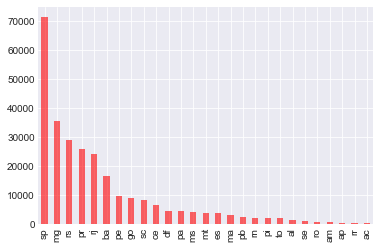

In [85]:
plot(geolocation,"state","bar")

##### 2.4.4 city 城市

In [86]:
geolocation.city.value_counts()

sao paulo                                 20591
curitiba                                   8715
rio de janeiro                             8368
belo horizonte                             7313
porto alegre                               5305
salvador                                   4726
brasilia                                   4577
recife                                     3019
goiania                                    2677
fortaleza                                  2602
contagem                                   1786
niteroi                                    1322
canoas                                     1296
santo andre                                1289
guarulhos                                  1277
osasco                                     1238
sao bernardo do campo                      1159
belem                                      1099
novo hamburgo                               926
nova iguacu                                 907
duque de caxias                         

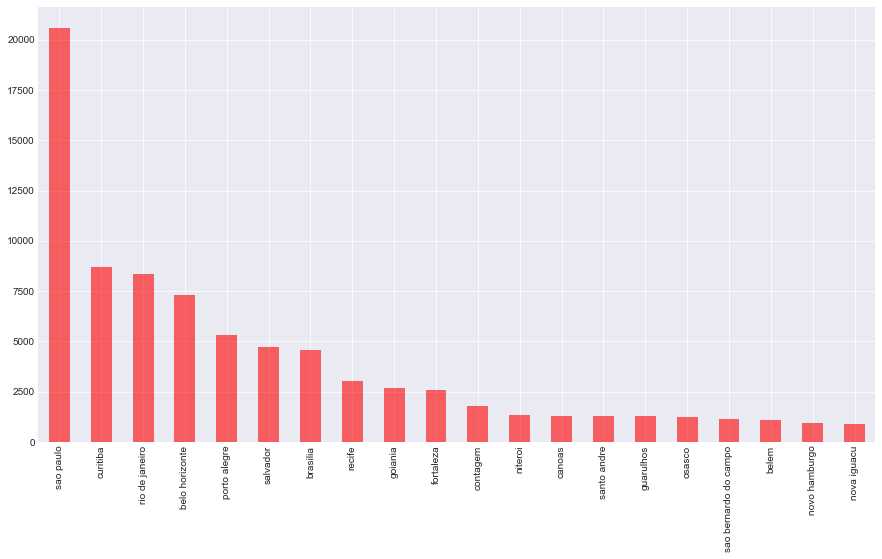

In [87]:
geolocation_top10 = geolocation.city.value_counts()[0:20]
geolocation_top10.plot(kind = "bar", color = "red", alpha = 0.6, figsize = (15,8))

### 顾客消费行为分析

#### 以顾客为数据粒度

In [88]:
customer_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 29 columns):
customer_id                      100000 non-null object
customer_unique_id               100000 non-null object
order_id                         100000 non-null object
order_status                     100000 non-null object
order_products_value             100000 non-null float64
order_freight_value              100000 non-null float64
order_items_qty                  100000 non-null int64
order_sellers_qty                100000 non-null int64
order_purchase_timestamp         100000 non-null object
order_aproved_at                 99982 non-null datetime64[ns]
order_estimated_delivery_date    100000 non-null object
order_delivered_customer_date    97595 non-null object
customer_city                    100000 non-null object
customer_state                   100000 non-null object
customer_zip_code_prefix         100000 non-null int64
product_category_name            100000 non-n

In [89]:
customer_2 = customer_2[["customer_unique_id","order_id","order_status","order_products_value","order_freight_value","order_aproved_at","customer_city","customer_state","product_category_name","order_items_qty","review_score","review_comment_message"]]
customer_2.head(2)

,customer_unique_id,order_id,order_status,order_products_value,order_freight_value,order_aproved_at,customer_city,customer_state,product_category_name,order_items_qty,review_score,review_comment_message
0,ac0e5d7f07043dd32831bdad3b99ad26,bdbeac23af8ee5dc1481782eaca3c24e,delivered,15.0,7.78,2018-01-30 04:31:19.335683,Sao Bernardo do Campo,SP,automotivo,1,5,NaN
1,4ed24aaed4079fe0661c0e4b3b420dff,e12e86e5dbfcb5d2820427e70fd658f3,delivered,72.9,22.83,2017-09-12 04:25:20.792749,RIO DE JANEIRO,RJ,beleza_saude,1,5,NaN


In [90]:
customer_2.nunique()

customer_unique_id        92516
order_id                  96264
order_status                  7
order_products_value       6080
order_freight_value        7644
order_aproved_at          96239
customer_city              4121
customer_state               27
product_category_name        71
order_items_qty              15
review_score                  5
review_comment_message    33782
dtype: int64